# Lab 7: Time Series

The following tutorial contains Python examples for Time series. As pandas was originally developed in the context of financial modeling, it has an extensive set of tools for working with dates, times and time-indexed data. As such, we will be discussing these here. Much of this is based on McKinney and VanderPlas.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## 7.1 Dates and times in Python

In general, anything that is observed or measured at many different points in time forms a time series. As such, time series are applicable to a range of fields, including finance, economics, ecology, neuroscience and physics. In a rough sense, we can split time series into two camps:

- _Fixed frequency_: This means that data points occur at regular intervals. This could be every 5 seconds, 5 minutes, once a week etc.
- _Irregular frequency_: This means there is no fixed unit of time between measurements.

How we mark and refer to time series data depends on the application. We may have one of the following:

- _Timestamps_: These are particular moments in time, e.g. 2nd February at 15:59pm.
- _Fixed periods_: This may be a month (e.g. January 2023) or a year (2022), say.
- _Intervals of time_: These are indicated a start and end timestamp. In a sense, periods can be thought of as special cases of intervals.
- _Time Deltas or durations_: These are exact lengths of time, e.g. a duration of 30seconds.

We start the discussion  of time series by discussing dates and times. Python's basic objects for these resides in the in-built `datetime` module.

In [1]:
from datetime import datetime

now = datetime.now()

print(now)
print(now.year)
print(now.month)
print(now.day)

2023-02-21 16:22:29.291168
2023
2
21


There is also a third-party `dateutil` module which can quickly perform a host of useful functionalities on dates and times.

In [2]:
from dateutil import parser

date = parser.parse("25th of December, 2023")
print(date)

# We can then do things like print the day of the week.

print(date.strftime('%A'))

2023-12-25 00:00:00
Monday


What we have done here is used one of the standard string format codes for printing dates (`'%A'`). More information on this can be read in the `strftime` section of Python's `datetime` documentation.

In [3]:
delta = datetime(2018, 3, 1) - datetime(2013, 9, 1)
delta

datetime.timedelta(days=1642)

In [4]:
print(delta.days)
print(delta.seconds)

1642
0


We can also add (or subtract) a `timedelta` or multiple thereof to a `datetime` object to produce a new shifted object.

In [5]:
from datetime import timedelta

start =datetime(2023,2,21)
start + timedelta(12)

datetime.datetime(2023, 3, 5, 0, 0)

In [6]:
start - 2 * timedelta(12)

datetime.datetime(2023, 1, 28, 0, 0)

## 7.2 Dates and Times in NumPy

NumPy's `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented compactly and operated on in an efficient way.

In [7]:
import numpy as np

date = np.array('2023-02-21', dtype=np.datetime64)
print(date)

# We can now perform vectorised operations quickly
date + np.arange(12)

2023-02-21


array(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
       '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
       '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy `datetime64` arrays, this kind of operation can be accomplished much more quickly than if we were working directy with Python's `datetime` objects. This is particularly important when arrays get large.

There is an important detail of the `datetime64` and the related `timedelta64` objects that we should keep in mind: they are build on a fundamental time unit. Since `datetime64` is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit, i.e. `datetime64` imposes a trade-off between _time resolution_ and _maximum time span_.

__Example:__ Suppose we want a time resolution of 1 nanosecond. Then we only have enough information to encode a range of $2^{64}$ nanoseconds (just under 600 years).

As for how we obtain this fundamental unit, this is inferred by NumPy based on the input.

In [8]:
np.datetime64('2023-02-21')                      # day-based
np.datetime64('2023-02-21 12:50')                # minute-based
np.datetime64('2023-02-21 12:59:59.50', 'ns')    # forced a nanosecond-based time

numpy.datetime64('2023-02-21T12:59:59.500000000')

## 7.3 Dates and Times in pandas

As expected, pandas builds upon the tools above and, in doing so, provides a `Timestamp` object. This combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorised interface of `np.datetime64`. We can form a group of these `Timestamp` objects and construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

In [9]:
import pandas as pd
date = pd.to_datetime('25th of December, 2023')
date

Timestamp('2023-12-25 00:00:00')

In [10]:
date.strftime('%A')

'Monday'

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01',
               '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
              dtype='datetime64[ns]', freq=None)

## 7.4 Time Series Basics

The fundamental pandas data structures for working with time series data is as follows:

- For _timestamps_, pandas provides the `Timestamp` type. This is essentially a replacement for Python's native `datetime` but it is based on the more efficient `np.datetime64` data type. The associated `Index` structure is `DatetimeIndex`.
- For _time periods_, pandas provides the `Period` type. This encodes a fixed-frequency interval based on `np.datetime64`. The associated index structure is `PeriodIndex`.
- For _time deltas_ or _durations_, pandas provides the `timedelta` type. `Timedelta` is a more efficient replacement for Python's native `datetime.timedelta` type and is based on `np.timedelta64`. The associated index structure is `TimedeltaIndex`.

In [12]:
dates = [datetime(2023,2,21), datetime(2023,2,23), datetime(2023,2,25),
         datetime(2023,2,27), datetime(2023,3,1), datetime(2023,3,3)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2023-02-21   -0.059952
2023-02-23    1.474954
2023-02-25   -0.155558
2023-02-27   -0.423618
2023-03-01    0.279785
2023-03-03   -1.602661
dtype: float64

In [13]:
ts.index    # Under the hood, these datetime objects have been put in a DatetimeIndex

DatetimeIndex(['2023-02-21', '2023-02-23', '2023-02-25', '2023-02-27',
               '2023-03-01', '2023-03-03'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# Go the other way
index = pd.DatetimeIndex(['2023-02-21', '2023-02-23', '2023-02-25',
                         '2023-02-27', '2023-03-01', '2023-03-03'])
data = pd.Series([0, 1, 2, 3, 4, 5], index=index)
data

2023-02-21    0
2023-02-23    1
2023-02-25    2
2023-02-27    3
2023-03-01    4
2023-03-03    5
dtype: int64

Like other `Series`, arithmetic operations between differently indexed time series automatically aligns on the dates.

In [15]:
ts + ts[::2]    # ts[::2] selects ever second element in ts

2023-02-21   -0.119905
2023-02-23         NaN
2023-02-25   -0.311117
2023-02-27         NaN
2023-03-01    0.559571
2023-03-03         NaN
dtype: float64

We can index and select data based on labels, just like any other `pd.Series'.

In [16]:
stamp = ts.index[2]
ts[stamp]

-0.1555582820375759

In [17]:
ts['03/01/2023']

0.27978531765747755

In [18]:
ts['20230301']

0.27978531765747755

In [19]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2023', periods=1000))
longer_ts

2023-01-01   -0.656461
2023-01-02   -1.671579
2023-01-03    0.179268
2023-01-04   -0.547874
2023-01-05   -1.772588
                ...   
2025-09-22    0.427543
2025-09-23    0.078917
2025-09-24   -0.443610
2025-09-25   -1.227377
2025-09-26    0.918381
Freq: D, Length: 1000, dtype: float64

In [20]:
longer_ts['2024']

2024-01-01    0.774398
2024-01-02    1.913807
2024-01-03    0.232181
2024-01-04   -0.458150
2024-01-05   -0.615830
                ...   
2024-12-27    0.985113
2024-12-28    0.592111
2024-12-29   -0.130612
2024-12-30   -0.042372
2024-12-31    0.862520
Freq: D, Length: 366, dtype: float64

In [21]:
# We can slice with datetime objects
ts[datetime(2023,3,1):]

2023-03-01    0.279785
2023-03-03   -1.602661
dtype: float64

Sometimes there might be duplicate observations falling on a particular timestamp.  Indexing in such time series will now produce outputs that depend on whether a timestamp is duplicated.

In [22]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [23]:
dup_ts.index.is_unique

False

In [24]:
dup_ts['1/3/2000']    # Not duplicated

4

In [25]:
dup_ts['1/2/2000']    # Duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [26]:
# We can aggregate the data having non-unique timestamps
grouped = dup_ts.groupby(level=0)
print(grouped.mean(), '\n')
print(grouped.count())

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64 

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64


## 7.5 Generating data ranges

We have glossed over this fact so far, but `pd.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency.

In [27]:
index = pd.date_range('2023-02-21', '2023-05-03')    # By default, date_range generated daily timestamps
index

DatetimeIndex(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20',
               '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
               '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01',
               '2023-04-02', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17',
      

In [28]:
pd.date_range(start='2023-02-21', periods=28)

DatetimeIndex(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range(end='2023-05-03', periods=28)

DatetimeIndex(['2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17',
               '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21',
               '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# If we pass 'BM' then we get the business end of month
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

## 7.6 Shifting (leading and lagging) data

Any time we want to move backwards or forwards through time, we call this 'shifting'. Both `Series` and `DataFrame` have a `shift` method for doing naive shifts in either direction, leaving the index unmodified.

In [31]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.455797
2000-02-29   -0.130472
2000-03-31   -0.907758
2000-04-30    0.709798
Freq: M, dtype: float64

In [32]:
print(ts.shift(2), '\n')
print(ts.shift(-2))

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.455797
2000-04-30   -0.130472
Freq: M, dtype: float64 

2000-01-31   -0.907758
2000-02-29    0.709798
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


Shifting in this way introduces missing data, either at the start or end of the time series.

A common use of `shift` is computing percent changes in a time series or multiple time series as DataFrame columns. This is expressed as: `ts / ts.shift(1)-1`. Since naive shifts leave the index unmodified, some data is discarded. Thus, if the frequency is known, it can be passed to `shift` to advance the timestamps instead of simply the data.

In [33]:
ts.shift(2, freq='M')

2000-03-31   -0.455797
2000-04-30   -0.130472
2000-05-31   -0.907758
2000-06-30    0.709798
Freq: M, dtype: float64

In [34]:
# We can pass other frequencies as well
ts.shift(3, freq='D')

2000-02-03   -0.455797
2000-03-03   -0.130472
2000-04-03   -0.907758
2000-05-03    0.709798
dtype: float64

In [35]:
ts.shift(1, freq='90T')    # The T here stands for minutes

2000-01-31 01:30:00   -0.455797
2000-02-29 01:30:00   -0.130472
2000-03-31 01:30:00   -0.907758
2000-04-30 01:30:00    0.709798
dtype: float64

## 7.7 Handling time zones

Due to the messiness of working with different time zones, many time series users opt to work with time series in _coordinated universal time_ (UTC), which is the successor to Greenwich Mean Time and current international standard. Thus, time zones are expressed as offsets from UTC, e.g. New York is UTC-4 (during daylight savings) or UTC-5 (otherwise), while London is UTC+0.

As far as Python goes, time zone information comes from the `pytz` library (installable with pip or conda). This provides a range of time zone information which is invaluable given the historical changes to daylight savings time (DST) transition dates. As ever, there is documentation you are encouraged to look at.

In [36]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [37]:
tz = pytz.timezone('Asia/Tokyo')
tz

<DstTzInfo 'Asia/Tokyo' LMT+9:19:00 STD>

By default, time series in pandas are _time zone naive_. To convert from naive to _localised_, we use the `tz_localize_ method.

In [38]:
rng = pd.date_range('21/02/2023 14:55', periods=6, freq='D')    # Try passing tz='UTC'
ts = pd.Series(np.random.randn(len(rng)), index=rng)

print(ts, '\n')
print(ts.index.tz)

2023-02-21 14:55:00    1.024186
2023-02-22 14:55:00    0.500136
2023-02-23 14:55:00    0.654568
2023-02-24 14:55:00    0.959201
2023-02-25 14:55:00    0.490738
2023-02-26 14:55:00   -1.388171
Freq: D, dtype: float64 

None


In [39]:
ts_utc = ts.tz_localize('UTC')

print(ts_utc, '\n')
print(ts_utc.index.tz)

2023-02-21 14:55:00+00:00    1.024186
2023-02-22 14:55:00+00:00    0.500136
2023-02-23 14:55:00+00:00    0.654568
2023-02-24 14:55:00+00:00    0.959201
2023-02-25 14:55:00+00:00    0.490738
2023-02-26 14:55:00+00:00   -1.388171
Freq: D, dtype: float64 

UTC


Once a time series has been localised to a particular time zone, it can be converted to another time zone with `tz_convert`.

In [40]:
ts_utc.tz_convert('America/New_York')

2023-02-21 09:55:00-05:00    1.024186
2023-02-22 09:55:00-05:00    0.500136
2023-02-23 09:55:00-05:00    0.654568
2023-02-24 09:55:00-05:00    0.959201
2023-02-25 09:55:00-05:00    0.490738
2023-02-26 09:55:00-05:00   -1.388171
Freq: D, dtype: float64

## 7.8 Moving window functions

As one would expect, statistics and other functions are very important in understanding time series. In particular, we would often like to perform such operations over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. McKinney calls these _moving window functions_. Like other statistical functions, these also automatically exclude missing data.

In the following, we load some time series data and resample it to business day frequency.

In [41]:
close_px_all = pd.read_csv('stock_px.csv',
                           parse_dates=True, index_col=0)

In [42]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [43]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

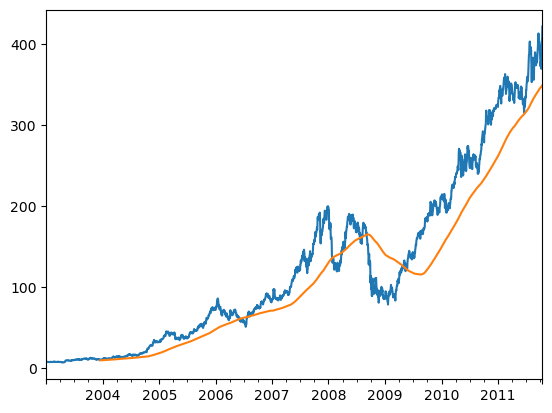

In [44]:
# Next we introduce the rolling operator. It behaves similarly ti resample and groupby. It can be called on a Series or
# DataFrame along with a window (expressed as a number of periods)
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

The expression `rolling(250)` is similar to `groupby` but instead of grouping it creates an object that enables grouping over a 250-day sliding window. In the above, we have a 250-day moving window average of Apple's stick price.

By default, rolling functions require all of the values in the window to be non-NA. However, this can be changed to account for missing data and, in particular, the fact that we will have fewer than `window` periods of data at the beginning of the time series.

In [45]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

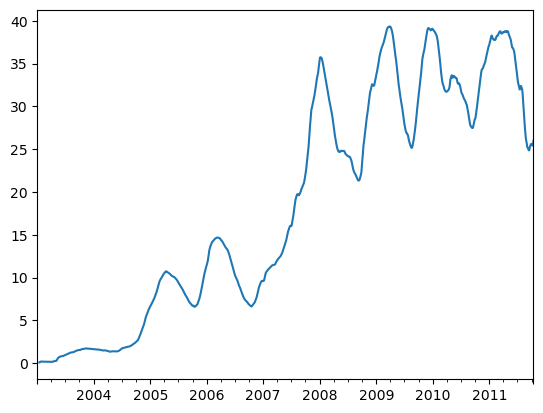

In [46]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std().plot()

Calling a moving window function on a DataFrame applies the transformation to each column.

<AxesSubplot:>

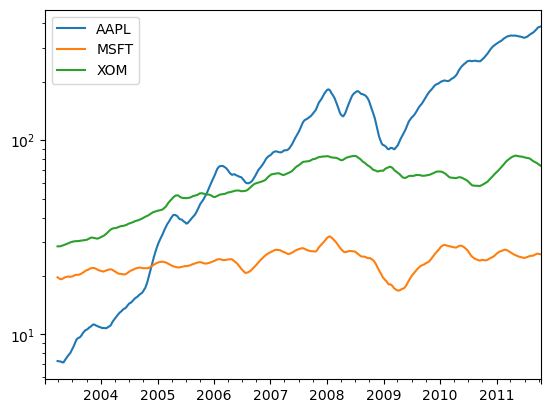

In [47]:
close_px.rolling(60).mean().plot(logy=True)

The `rolling` function also accepts a string indicating a fixed-size time offset rather than a set number of periods. For example, we could compute a 20-day rolling mean:

In [48]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


An alternative to using a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular way is to use a _span_. This makes the result comparable to a simple moving window function with window size equal to the span.

In [49]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30,min_periods=20).mean()

In [50]:
ewma60 = aapl_px.ewm(span=30).mean()

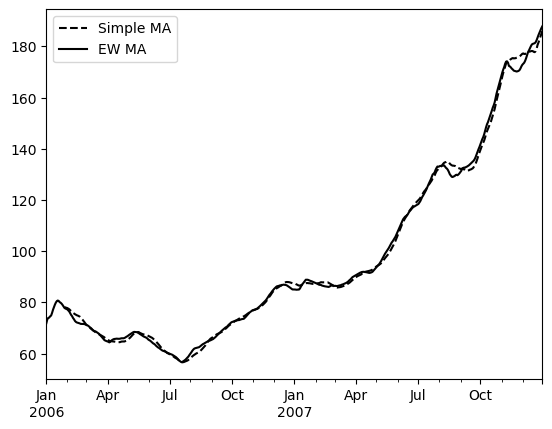

In [51]:
import matplotlib.pyplot as plt

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')

plt.legend()

Since an exponentially weighted statistic places more weight on more recent observations, it 'adapts' faster to changes compared with the equal-weighted version.

__Exercises:__

- Read Chapter 11 of McKinney or Chapter 23 of VanderPlas.
- Download the Seattle Fremont Bridge cycle counter data set, found at http://data.seattle.gov. The Fremond Bridge Bicycle Counter dataset is available under the Transportation category. Use this dataset to first obtain some summary statistics. Next, visualise the data and explore various ways to aggregate the data (hint: `pd.rolling_mean`), group the data etc. Try to obtain as much information as possible and use this to tell a story about the data set.

In [52]:
# Solution taken from VanderPlas
# First, we download the csv
url = ('https://raw.githubusercontent.com/jakevdp/'
       'bicycle-data/main/FremontBridge.csv')
!curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 4585k    0 15521    0     0  21669      0  0:03:36 --:--:--  0:03:36 21768
 92 4585k   92 4227k    0     0  2735k      0  0:00:01  0:00:01 --:--:-- 2741k
100 4585k  100 4585k    0     0  2832k      0  0:00:01  0:00:01 --:--:-- 2837k


In [53]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


In [54]:
# Shorten column names for convenience
data.columns = ['Total', 'East', 'West']

In [55]:
# View summary statistics
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

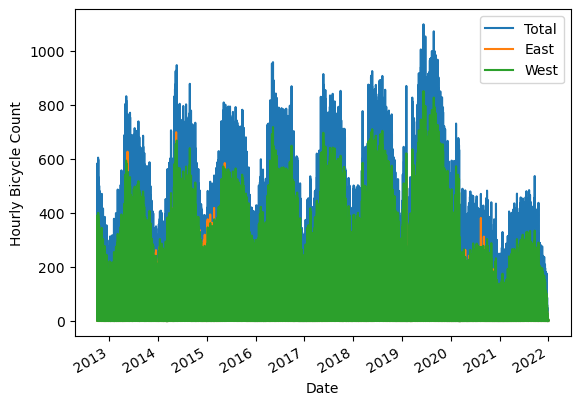

In [56]:
# Plot the data
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

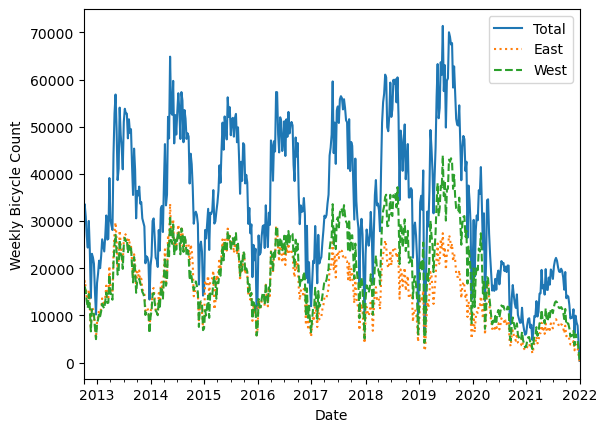

In [57]:
# Samples are too dense to determine much. As such, we resample the data to a coarser grid
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly Bicycle Count')

This begins to tell a story. We see that people cycle more in the summer months (expected), and cycling dropped off in 2020, 2021 and 2022 (again, expected). 

Text(0, 0.5, 'Mean Hourly Count')

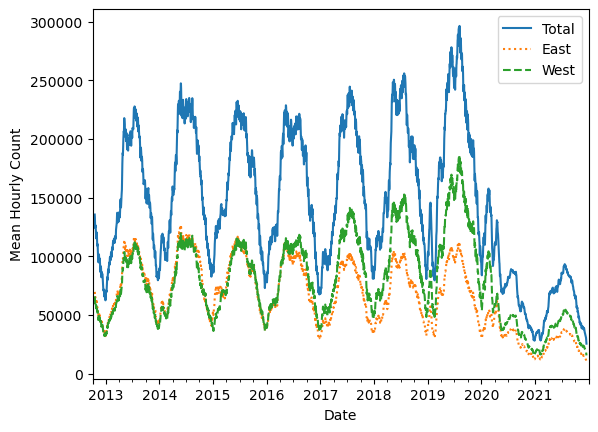

In [58]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('Mean Hourly Count')

<AxesSubplot:xlabel='Date'>

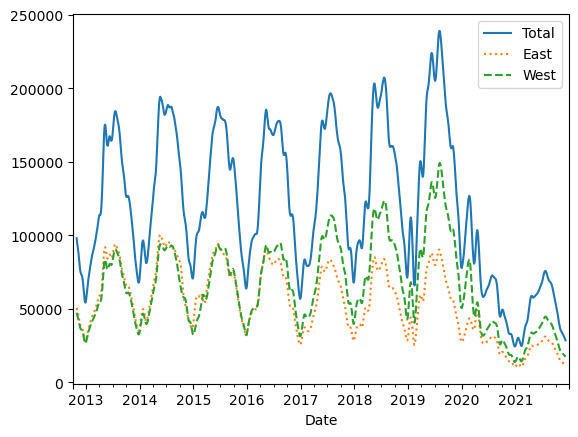

In [59]:
# A smoother version is obtained using a window function such as Gaussian
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'])

<AxesSubplot:xlabel='time'>

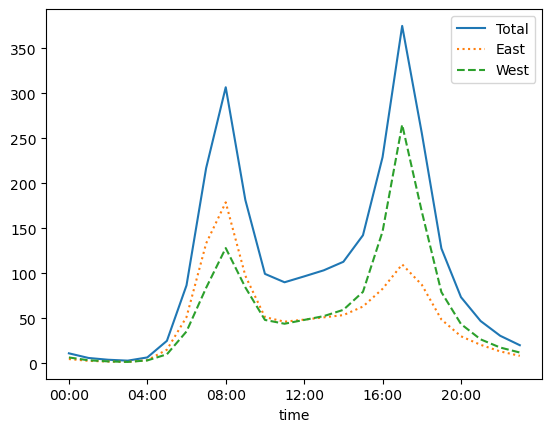

In [60]:
# Now we go deeper. We can look at the average traffic as a function of the time of day using groupby
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'])

We notice two peaks. One at around 8am, another around 5pm. This suggests commuter traffic crossing the bridge. We also note a directional component since the data suggests the east sidewalk is used more during the morning commite, while the west sidewalk is used more during the evening commute. If we want to further test this, then we would expect things to change based on the day of the week. We can check this again using `groupby`.

<AxesSubplot:>

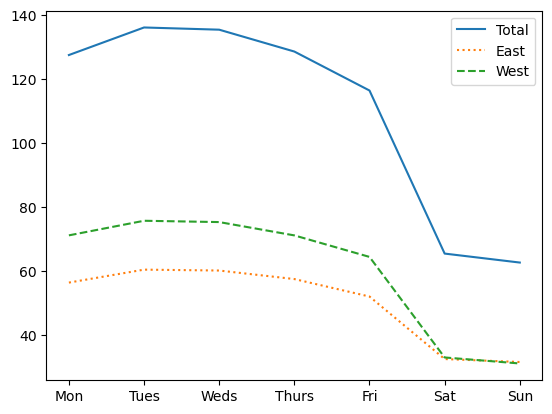

In [61]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])

This provides strong evidence for commuter traffic as there is around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday. We can now do a compound `groupby` and look at the hourly trends on weekdays versus weekends.

In [62]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

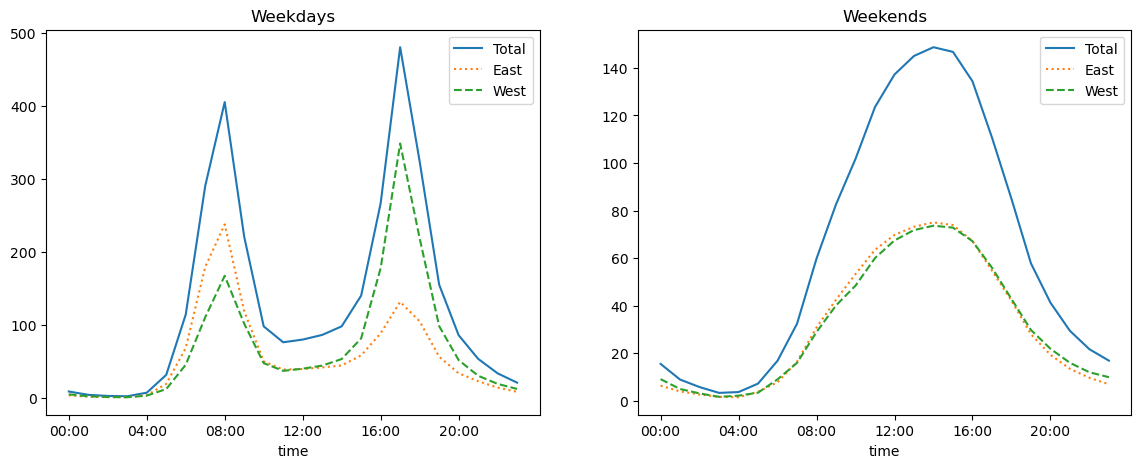

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=['-', ':', '--'])

We observe a bomodal pattern on weekdays (suggesting commuter traffic), while on the weekends we notice a unimodal pattern (suggesting recreation). We could also look at the effects of weather, temperature, time of year and so on, but this is left as an exercise. McKinney has a blog on this which may be of use: https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/